## 0. Import Data

In [28]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# import data
df = pd.read_csv('HW1_Data.csv')
df.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.0,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.0,27,224,1,0,0,0,0,3,1


## 1. Data Preprocessing

In [30]:
df.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,58.665179,24.951385,8.065277,18.761908,391.222633,0.894704,0.363175,0.057163,0.184817,0.676931,0.044088,0.497162
std,44.163859,34.790147,16.610589,9.548019,254.998478,0.306939,0.480922,0.232158,0.388155,0.467656,0.224552,0.500000
min,-5.860000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,2.000000,17.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [31]:
df.isna().mean()

revenue     0.0
outcalls    0.0
incalls     0.0
months      0.0
eqpdays     0.0
webcap      0.0
marryyes    0.0
travel      0.0
pcown       0.0
creditcd    0.0
retcalls    0.0
churndep    0.0
dtype: float64

In [32]:
# Leave only revenue >= 0 and eqpdays >= 0
df = df[df['revenue'] >= 0]
df = df[df['eqpdays'] >= 0]

# Drop null values
df.dropna(inplace = True)

<Axes: xlabel='churndep', ylabel='count'>

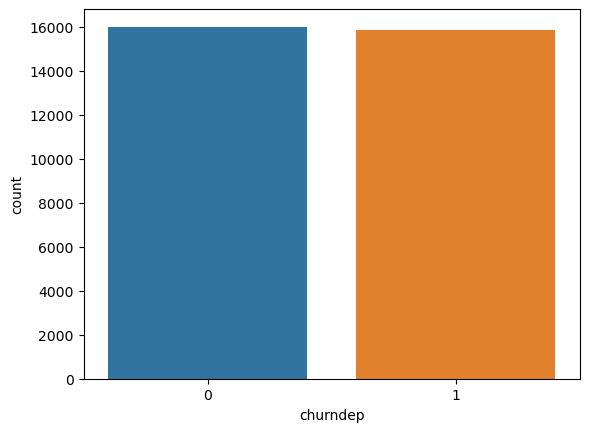

In [33]:
# check whether target data is imbalanced
sns.countplot(x='churndep', data=df)

In [7]:
plt.figure(figsize=(12, 9))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

NameError: name 'correlation_matrix' is not defined

<Figure size 1200x900 with 0 Axes>

## 2. Build a Decision Tree Model (a)

In [8]:
# train-test split
X = df.drop('churndep', axis = 1)
y = df['churndep']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
# create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=None, criterion='entropy')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [10]:
# accuracy score
accuracy_score = accuracy_score(y_test, pred)
print(f'Accuracy Score: {accuracy_score}')

Accuracy Score: 0.5327611471634918


In [11]:
# classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      4806
           1       0.53      0.53      0.53      4748

    accuracy                           0.53      9554
   macro avg       0.53      0.53      0.53      9554
weighted avg       0.53      0.53      0.53      9554



## 3. Hyperparameter Tuning (b)

In [12]:
from sklearn.metrics import accuracy_score
def try_diff_parameters(params):
    clf = DecisionTreeClassifier(**params)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    print('Accuracy Score:')
    accuracy = accuracy_score(y_test, pred)
    print(accuracy)

    print('Classification Report:')
    print(classification_report(y_test, pred))

    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

In [22]:
params1 = {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None,
            'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

params2 = {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth':  None, 'max_features': None,
            'max_leaf_nodes': 10, 'min_samples_leaf': 20, 'min_samples_split': 2}

params3 = {'class_weight': None,'criterion': 'entropy', 'max_depth':  None, 'max_features': 'sqrt',
            'max_leaf_nodes': 10,'min_samples_leaf': 15,'min_samples_split': 5}

params4 = {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth':  None, 'max_features': 'sqrt',
            'max_leaf_nodes': None,'min_samples_leaf': 5,'min_samples_split': 10}

params5 = {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth':  None, 'max_features': 'log2',
           'max_leaf_nodes': 8, 'min_samples_leaf': 25,'min_samples_split': 3}

Accuracy Score:
0.5992254553066778
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.43      0.52      4806
           1       0.57      0.77      0.66      4748

    accuracy                           0.60      9554
   macro avg       0.61      0.60      0.59      9554
weighted avg       0.61      0.60      0.59      9554



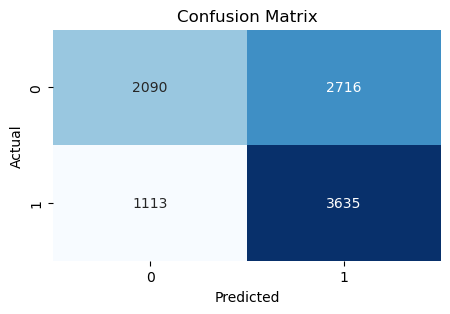

In [23]:
try_diff_parameters(params1)

Accuracy Score:
0.5992254553066778
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.43      0.52      4806
           1       0.57      0.77      0.66      4748

    accuracy                           0.60      9554
   macro avg       0.61      0.60      0.59      9554
weighted avg       0.61      0.60      0.59      9554



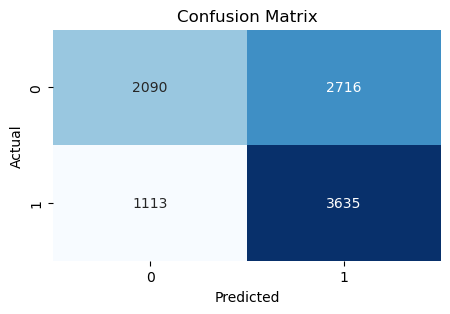

In [24]:
try_diff_parameters(params2)

Accuracy Score:
0.5901193217500523
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.49      0.55      4806
           1       0.57      0.69      0.63      4748

    accuracy                           0.59      9554
   macro avg       0.59      0.59      0.59      9554
weighted avg       0.59      0.59      0.59      9554



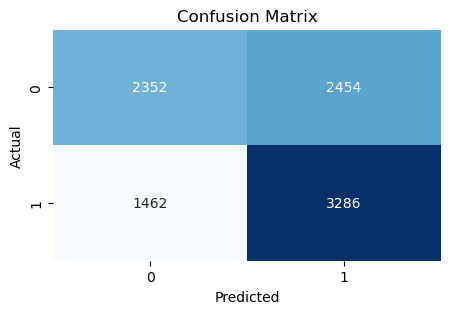

In [25]:
try_diff_parameters(params3)

Accuracy Score:
0.5417626125183169
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      4806
           1       0.54      0.56      0.55      4748

    accuracy                           0.54      9554
   macro avg       0.54      0.54      0.54      9554
weighted avg       0.54      0.54      0.54      9554



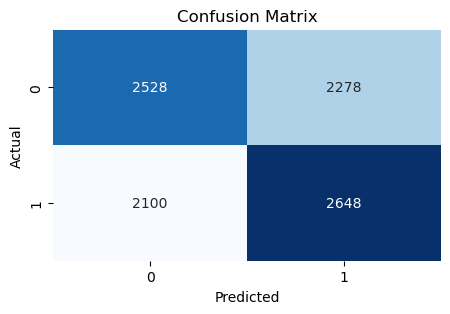

In [26]:
try_diff_parameters(params4)

Accuracy Score:
0.5669876491521876
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.31      0.42      4806
           1       0.54      0.83      0.66      4748

    accuracy                           0.57      9554
   macro avg       0.59      0.57      0.54      9554
weighted avg       0.59      0.57      0.54      9554



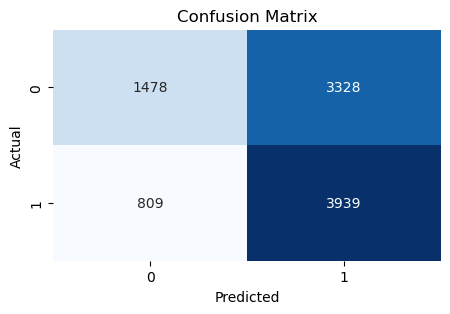

In [27]:
try_diff_parameters(params5)

## 4. Model Selection (c)

In [19]:
final_model = DecisionTreeClassifier(**params1)

# Fit the model to the training data
final_model.fit(X_train, y_train)

# Make predictions on the test data
pred = final_model.predict(X_test)

Accuracy Score:
0.5992254553066778
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.43      0.52      4806
           1       0.57      0.77      0.66      4748

    accuracy                           0.60      9554
   macro avg       0.61      0.60      0.59      9554
weighted avg       0.61      0.60      0.59      9554



Text(0.5, 1.0, 'Confusion Matrix')

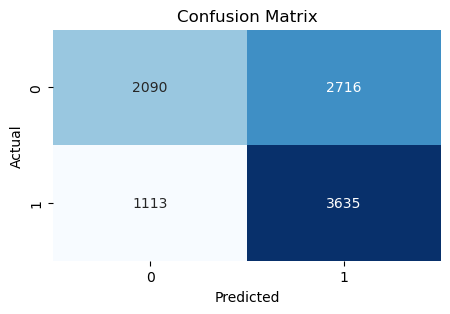

In [20]:
print('Accuracy Score:')
accuracy = accuracy_score(y_test, pred)
print(accuracy)

print('Classification Report:')
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

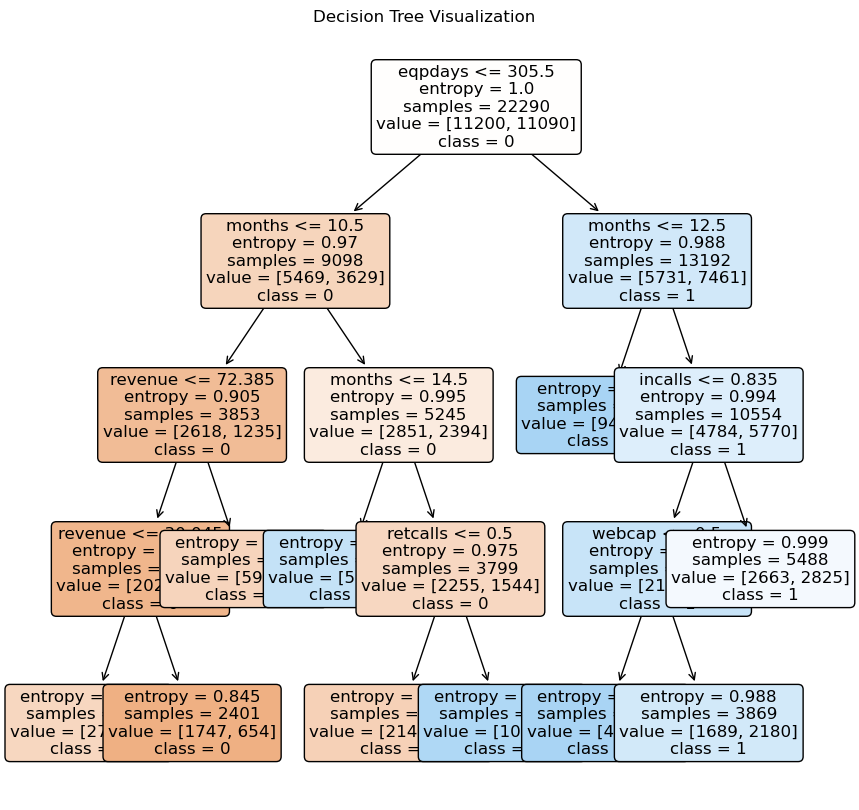

In [21]:
from sklearn import tree

plt.figure(figsize=(10, 10))

# Assuming your class names are "0" and "1"
class_names = ["0", "1"]

tree.plot_tree(final_model.fit(X_train, y_train),
               feature_names=df.columns[:-1],
               filled=True,
               class_names=class_names,  # Provide class names as strings
               rounded=True,
               fontsize=12)

plt.title('Decision Tree Visualization')
plt.show()